# Data Science Practicum2

## Online Shoppers Intentions Machine Learning Project

### MSDS696 - Regis University

##### By Kathryne Taylor

In [19]:
# jupternotebooks code that fits the display window to my screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

Purpose of the Project:

In this project, I am to highlight several data science topics and techniques I learned while in the Master's in Data Science Program at Regis University. This is my final product for the Data Science Practicum2 Course. 

Componets of this Project:

1. Exploratory Data Analysis

2. Data Cleaning

3. Logistic Regression

4. Clustering Analysis

5. Machine Learning

In [20]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# import visualization libraries
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns
%matplotlib inline

# clustering 
from scipy.cluster.hierarchy import linkage,dendrogram

# machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# neural network 
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
import tensorflow as tf
import keras
from tensorflow.keras import layers, models
from keras.layers.normalization import BatchNormalization
from keras import regularizers
from keras import backend

# import dataset
df = pd.read_csv('C:/Users/13039/Downloads/online_shoppers_intention (1).csv')

import warnings
warnings.filterwarnings("ignore")

# #1: Exploratory Data Analysis (EDA)

In [21]:
print("Number of Website Visits: ", df.shape[0])
print("Number of Features: ", df.shape[1])

Number of Website Visits:  12330
Number of Features:  18


In [22]:
df.isnull().sum().sum()

19

In [23]:
df.isnull().sum()

Administrative             0
Administrative_Duration    1
Informational              6
Informational_Duration     3
ProductRelated             2
ProductRelated_Duration    0
BounceRates                1
ExitRates                  2
PageValues                 1
SpecialDay                 1
Month                      0
OperatingSystems           1
Browser                    1
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

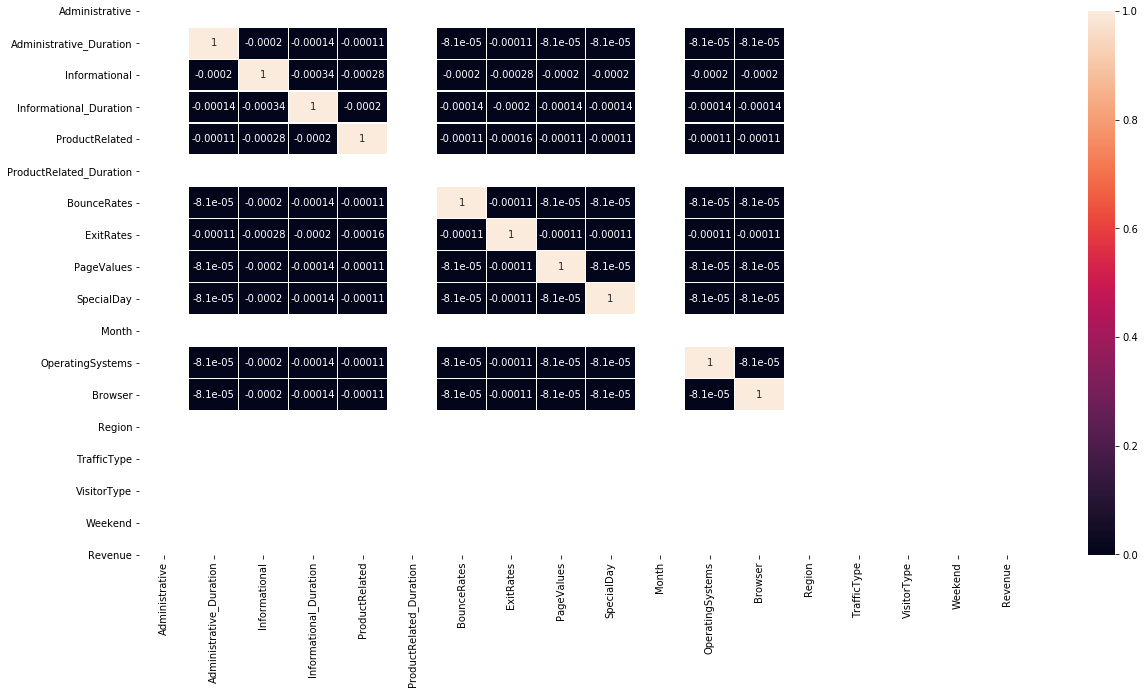

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull().corr(),annot=True,linewidths=.05)

In [25]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems           float64
Browser                    float64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12329 non-null float64
Informational              12324 non-null float64
Informational_Duration     12327 non-null float64
ProductRelated             12328 non-null float64
ProductRelated_Duration    12330 non-null float64
BounceRates                12329 non-null float64
ExitRates                  12328 non-null float64
PageValues                 12329 non-null float64
SpecialDay                 12329 non-null float64
Month                      12330 non-null object
OperatingSystems           12329 non-null float64
Browser                    12329 non-null float64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtype

In [27]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1.0,1,1,Returning_Visitor,False,False
1,0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2.0,1,2,Returning_Visitor,False,False
2,0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1.0,9,3,Returning_Visitor,False,False
3,0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2.0,2,4,Returning_Visitor,False,False
4,0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3.0,1,4,Returning_Visitor,True,False


In [28]:
# Take a look at basic statistics of the numerical features:

df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12329.000000,12324.000000,12327.000000,12328.000000,12330.000000,12329.000000,12328.000000,12329.000000,12329.000000,12329.000000,12329.000000,12330.000000,12330.000000
mean,2.315166,80.824246,0.503814,34.405424,31.732641,1194.746220,0.022193,0.043071,5.889736,0.061432,2.124017,2.356801,3.147364,4.069586
std,3.321784,176.785169,1.270417,140.534943,44.478939,1913.669288,0.048490,0.048598,18.569114,0.198925,0.911361,1.717033,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003114,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.300000,0.000000,0.000000,38.000000,1464.157213,0.016825,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [29]:
# Check Unique values:

print("Unique Values in Visitor Type: ", list(df.VisitorType.unique()))
print("Unique Values in Weekend: ", list(df.Weekend.unique()))
print("Unique Values in Revenue: ", list(df.Revenue.unique()))

Unique Values in Visitor Type:  ['Returning_Visitor', 'New_Visitor', 'Other']
Unique Values in Weekend:  [False, True]
Unique Values in Revenue:  [False, True]


### Revenue Breakdown

In [30]:
labels = ['False', 'True']
values = df['Revenue'].value_counts()
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
rev_count = df['Revenue'].value_counts()

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "table"}, {"type": "pie"}]])

fig.add_trace(
    go.Table(columnorder = [1,2],columnwidth = [80,80],header=dict(values=['False', 'True'],align=['center']),
                 cells=dict(values=[rev_count.iloc[0],rev_count.iloc[1]])),
    row=1, col=1)

fig.add_trace(go.Pie(labels=labels, values=values),row=1, col=2)

fig.show()


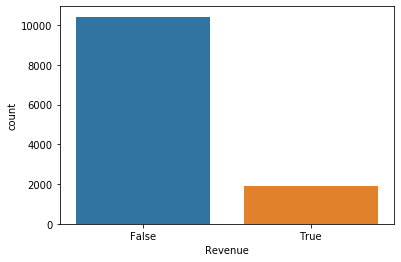

In [31]:
sns.countplot(x='Revenue', data=df)

From the above cells, we can infer that most people on the site did not make a purchase.

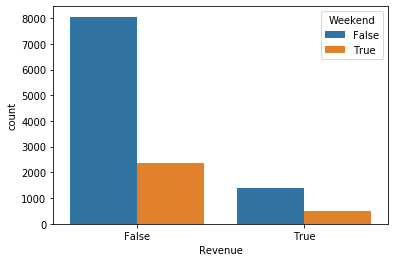

In [32]:
sns.countplot(x='Revenue',hue='Weekend', data=df)

Most puchases were made on weekdays, rather than on the weekend.

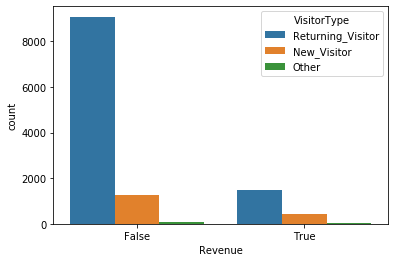

In [33]:
sns.countplot(x='Revenue',hue='VisitorType', data=df)

From the chart above, we can infer that most of the Purchases came from Returning Users.

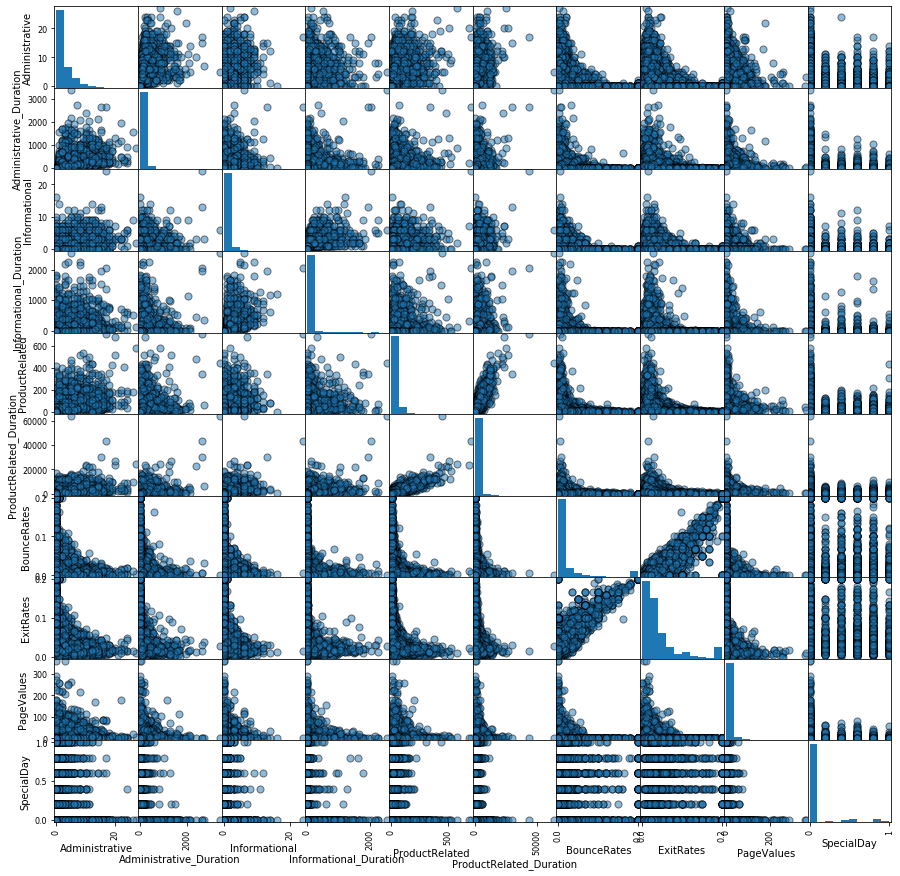

In [34]:
# Scatter Matrix
cols = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

pd.plotting.scatter_matrix(df[cols], figsize= [15,15], diagonal='hist', alpha=0.5, s = 200, edgecolor= "black")
plt.show()

The Scatter Matrix shows the relationship between each of the features and if a purchase was made.

In [35]:
# Change boolean values to dummy variables

# False = 0, True = 1

df[['Weekend', 'Revenue']] = df[['Weekend', 'Revenue']].values.astype(int)



In [36]:
# Change strings values to int. values

df['VisitorType'] = np.asarray([1 if val == "Returning_Visitor" 
                               else 0 for val in df['VisitorType'].values])


In [37]:
# Lets look at Revenue by Month
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

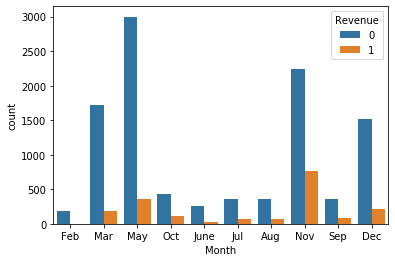

In [38]:
sns.countplot(x='Month',hue='Revenue', data=df)

Most purchases were made in the months of May, November, March, and December. The frequency of purchase depends greatly on the time of year. Thus, the month can be a good predictor of the outcome variable.

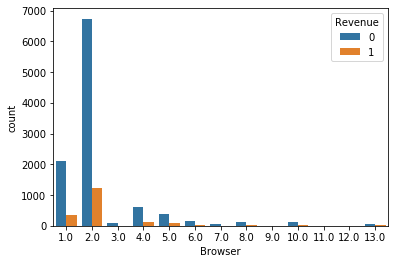

In [39]:
# Types of browsers

sns.countplot(x='Browser',hue='Revenue', data=df)

In [40]:
# Since our dependent variable is imbalanced with a ratio of (85:15)

df.groupby('Revenue').mean()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
Revenue,,,,,,,,,,,,,,,,
0,2.117732,73.746100,0.452006,30.155779,28.715451,1069.987809,0.025320,0.047377,1.975998,0.068432,2.129738,2.339123,3.159278,4.078392,0.87133,0.227308
1,3.393606,119.483244,0.786988,57.611427,48.210168,1876.209615,0.005117,0.019555,27.278815,0.023178,2.092767,2.453354,3.082285,4.021488,0.77044,0.261530


- Admin_duration, ProductRelated, Page_Values has a large variance between those who made a purchase and those who did not.
- Weekend, VisitorType, TrafficType, Region, Browser, Op. System all seem to have suprising equal averages for Purchase vs No Purchase

In [41]:
df.groupby('Revenue').std()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
Revenue,,,,,,,,,,,,,,,,
0,3.202481,171.025083,1.211783,133.638121,40.748486,1803.797757,0.051879,0.051233,9.072424,0.209054,0.907877,1.681488,2.400493,4.03222,0.334851,0.419113
1,3.730527,201.114732,1.521761,171.619131,58.267365,2312.214392,0.012185,0.016463,35.195642,0.123553,0.929779,1.897042,2.407173,3.98714,0.420660,0.439583


- Administrative_Duration, Informational_Duration, ProductRelated_Duration, and PageValues have a large difference in standard deviation


#### Distribution of Values

In [42]:
df.groupby('Revenue').skew()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
Revenue,,,,,,,,,,,,,,,,
0,2.095139,6.103609,4.448869,8.459552,4.693635,8.832963,2.663529,1.939958,9.558795,3.083380,1.952880,3.240565,0.972989,1.914563,-2.218310,1.301533
1,1.454998,3.985242,2.696825,4.982568,3.259431,3.337611,8.277173,3.477684,3.251362,5.790255,2.651941,3.188300,1.043301,2.237808,-1.287139,1.086119


- Administrative_Duration, Informational_Duration, ProductRelated_Duration, BounceRates and PageValues have a large difference in skewness between Revenue
- Visitor Type is the only attribute skewed to the left

In [43]:
df.skew().sort_values(ascending=False)

Informational_Duration     7.596278
ProductRelated_Duration    7.263228
PageValues                 6.382709
Administrative_Duration    5.615506
ProductRelated             4.341138
Informational              4.035396
SpecialDay                 3.302498
Browser                    3.243736
BounceRates                2.947707
ExitRates                  2.149003
OperatingSystems           2.066173
TrafficType                1.962987
Administrative             1.960357
Revenue                    1.909509
Weekend                    1.265962
Region                     0.983549
VisitorType               -2.024961
dtype: float64

Text(0.5, 0, '')

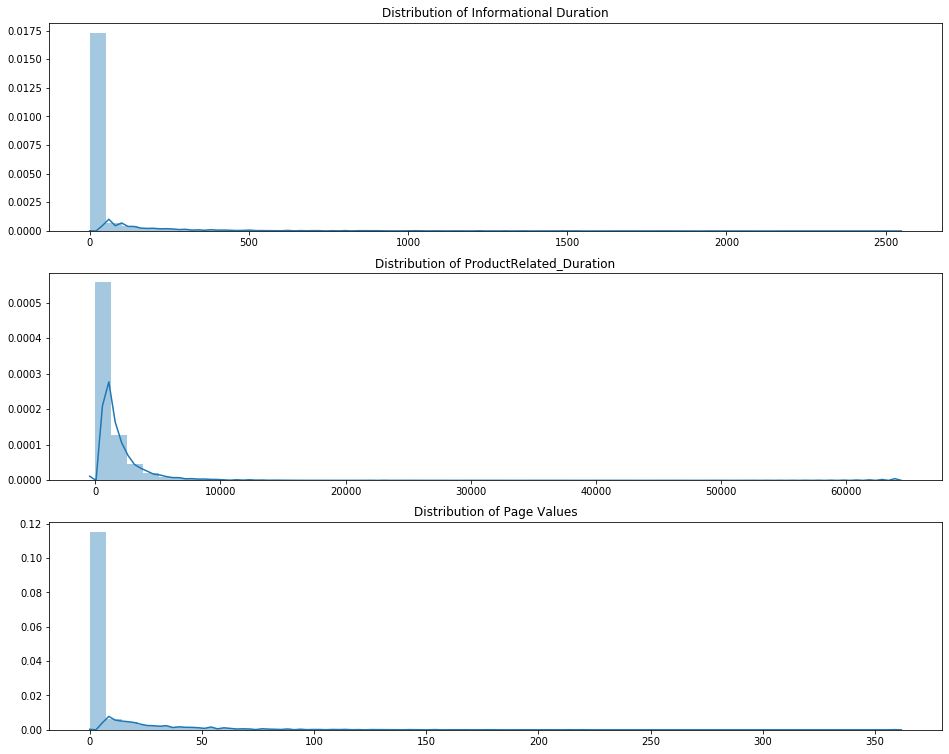

In [44]:
fig, axes = plt.subplots(3,1, figsize=(16,13))
ax1 = sns.distplot(df["Informational_Duration"],ax = axes[0])
ax1.set_title("Distribution of Informational Duration")
ax1.set_xlabel("")

ax2 = sns.distplot(df["ProductRelated_Duration"],ax = axes[1])
ax2.set_title("Distribution of ProductRelated_Duration")
ax2.set_xlabel("")

ax3 = sns.distplot(df["PageValues"],ax = axes[2])
ax3.set_title("Distribution of Page Values")
ax3.set_xlabel("")


Text(0.5, 0, '')

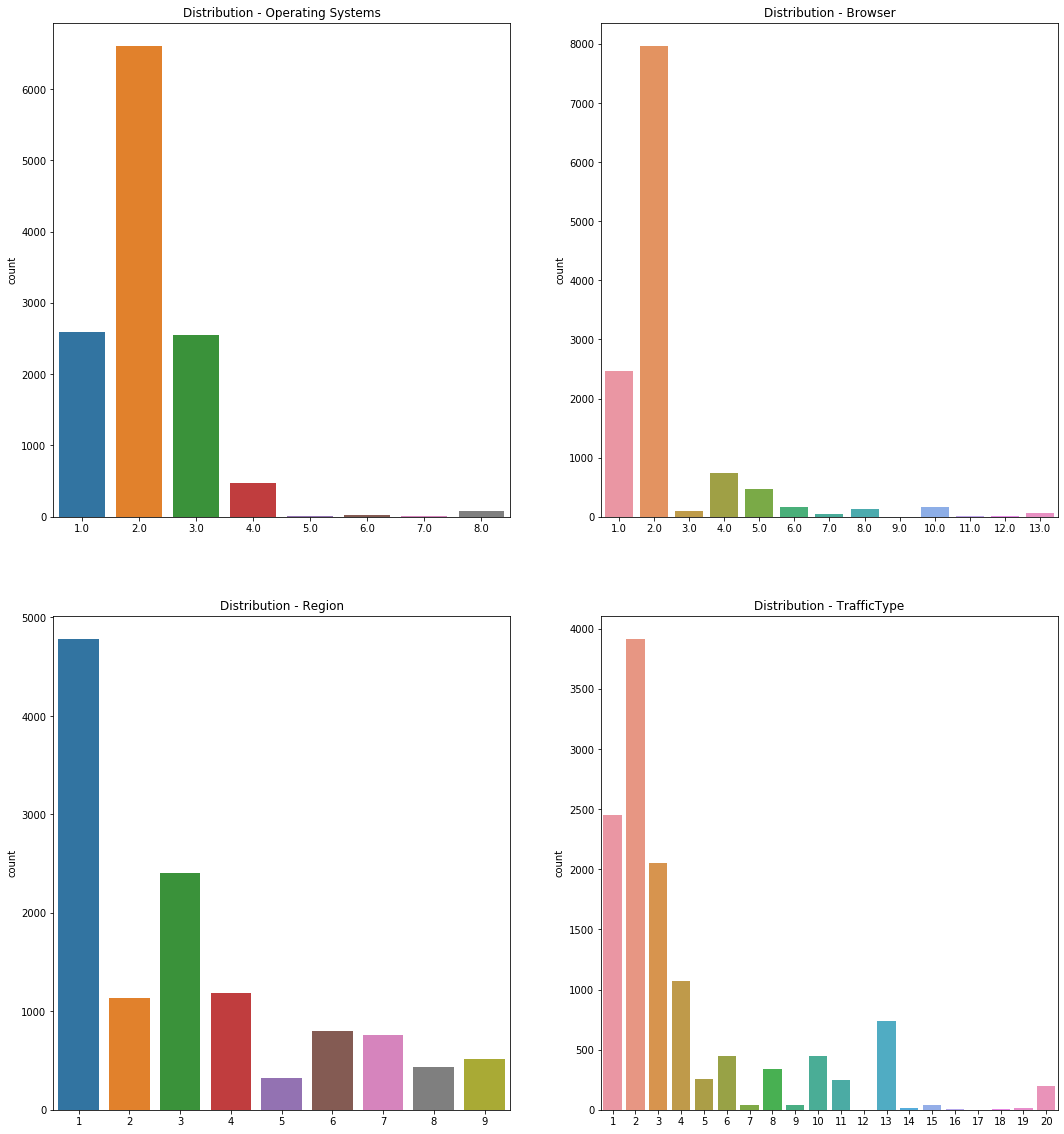

In [45]:
fig, axes = plt.subplots(2,2, figsize=(18,20))
ax1 = sns.countplot(x= df["OperatingSystems"],data = df,ax = axes[0,0])
ax1.set_title("Distribution - Operating Systems")
ax1.set_xlabel("")

ax2 = sns.countplot(x= df["Browser"],data = df,ax = axes[0,1])
ax2.set_title("Distribution - Browser")
ax2.set_xlabel("")

ax3 = sns.countplot(x= df["Region"],data = df,ax = axes[1,0])
ax3.set_title("Distribution - Region")
ax3.set_xlabel("")

ax4 = sns.countplot(x= df["TrafficType"],data = df,ax = axes[1,1])
ax4.set_title("Distribution - TrafficType")
ax4.set_xlabel("")

## #3. Data Cleaning

#### Missing Values

In [46]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Informational,6,0.000487
Informational_Duration,3,0.000243
ProductRelated,2,0.000162
ExitRates,2,0.000162
PageValues,1,0.000081
BounceRates,1,0.000081
Administrative_Duration,1,0.000081
Browser,1,0.000081
OperatingSystems,1,0.000081
SpecialDay,1,0.000081


In [47]:
df = df.groupby(df.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))
total = df.isnull().sum().sort_values(ascending=False)
total

Revenue                    0
Weekend                    0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Administrative             0
dtype: int64

#### Converting Categorical Features

In [48]:
# the only categorical feature is month
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null float64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null float64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null float64
Browser                    12330 non-null float64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null int32
Weekend                    12330 non-null int64
Revenue                    12330 non-null int64
dtyp

In [49]:
df2 = pd.get_dummies(df,drop_first=True)

df2.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep'],
      dtype='object')

In [50]:
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [51]:
X = df2.drop(['Revenue'], axis =1)
y = df['Revenue']

#### Normalize values

In [311]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X = scalar.fit_transform(X)

#### Test Train Split

In [312]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [313]:
print("Number of training samples: ", x_train.shape[0])
print("Number of training/testing attributes: ", x_test.shape[1])
print("Number of test samples: ", x_test.shape[0])


Number of training samples:  8631
Number of training/testing attributes:  25
Number of test samples:  3699


#### Function for calculating accuracy

In [257]:
def accuracy(y_test,y_pred):
    from sklearn.metrics import confusion_matrix
    result = confusion_matrix(y_pred,y_test)
    acc = ((result[0][0]+result[1][1])/(len(y_test)))*100
    return acc

##  #3. Logistic Regression

### Assumption of Continuous Attributes being Linearly Related to the Log Odds

Text(0.5, 1.0, 'PageValues')

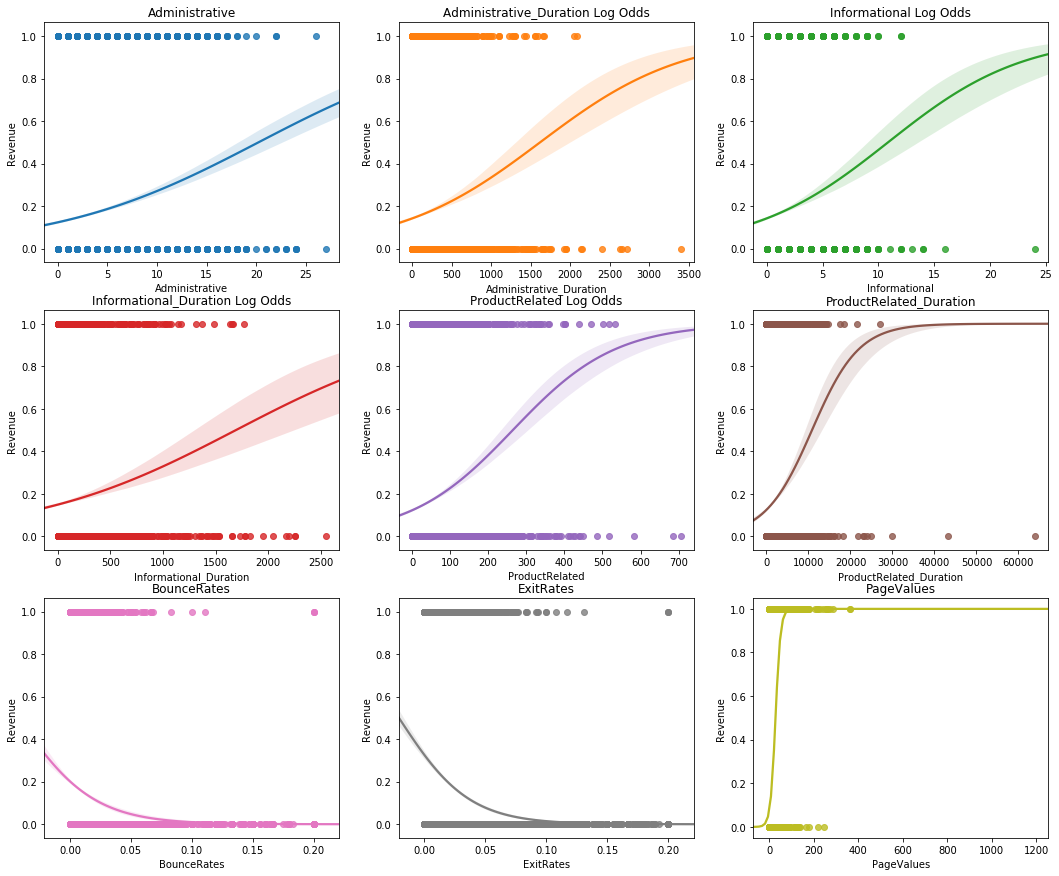

In [387]:
fig, axes = plt.subplots(3,3, figsize=(18,15))
ax1 = sns.regplot(x= 'Administrative', y= 'Revenue', data= df,ax = axes[0,0], logistic= True)
ax1.set_title("Administrative")
ax2 = sns.regplot(x= 'Administrative_Duration', y= 'Revenue', data= df,ax = axes[0,1], logistic= True)
ax2.set_title("Administrative_Duration Log Odds")
ax3 = sns.regplot(x= 'Informational', y= 'Revenue', data= df,ax = axes[0,2], logistic= True)
ax3.set_title("Informational Log Odds")
ax4 = sns.regplot(x= 'Informational_Duration', y= 'Revenue', data= df,ax = axes[1,0], logistic= True)
ax4.set_title("Informational_Duration Log Odds")
ax5 = sns.regplot(x= 'ProductRelated', y= 'Revenue', data= df,ax = axes[1,1], logistic= True)
ax5.set_title("ProductRelated Log Odds")
ax6 = sns.regplot(x= 'ProductRelated_Duration', y= 'Revenue', data= df,ax = axes[1,2], logistic= True)
ax6.set_title("ProductRelated_Duration")
ax7 = sns.regplot(x= 'BounceRates', y= 'Revenue', data= df,ax = axes[2,0], logistic= True)
ax7.set_title("BounceRates")
ax8 = sns.regplot(x= 'ExitRates', y= 'Revenue', data= df,ax = axes[2,1], logistic= True)
ax8.set_title("ExitRates")
ax9 = sns.regplot(x= 'PageValues', y= 'Revenue', data= df,ax = axes[2,2], logistic= True)
ax9.set_title("PageValues")

Logistic Regression requires the attributes be linearly related to the log odds of the dependent variable. In this test, we are looking for an S Shaped curve. The variables Bounce rates and Exit rates are not flat, but do not show a direct S curve. 

### Assumption of Absence of Multicollinearity

In [272]:
df2.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
Administrative,1.000000,0.601594,0.376885,0.256602,0.431103,0.373939,-0.223557,-0.316468,0.099057,-0.094765,...,0.138917,-0.014443,-0.065649,0.006221,-0.001902,-0.055036,-0.064587,0.051574,0.091266,0.059607
Administrative_Duration,0.601594,1.000000,0.302647,0.238634,0.289069,0.355409,-0.144172,-0.205816,0.067649,-0.073317,...,0.093574,-0.005003,-0.044528,-0.002102,-0.018979,-0.023124,-0.039338,0.032414,0.055094,0.031307
Informational,0.376885,0.302647,1.000000,0.619733,0.374185,0.387545,-0.116062,-0.163583,0.048684,-0.048194,...,0.095299,0.002744,-0.039867,0.002034,0.007146,-0.027951,-0.038541,0.063797,-0.002661,0.009655
Informational_Duration,0.256602,0.238634,0.619733,1.000000,0.279973,0.347126,-0.073926,-0.105103,0.031091,-0.030446,...,0.070664,0.010524,-0.027884,0.015073,-0.015359,-0.012788,-0.031571,0.037276,0.006547,0.001840
ProductRelated,0.431103,0.289069,0.374185,0.279973,1.000000,0.860962,-0.204593,-0.292525,0.056299,-0.023977,...,0.158527,-0.033920,-0.056867,0.020029,0.015068,-0.114611,-0.072237,0.182325,0.008901,0.005991
ProductRelated_Duration,0.373939,0.355409,0.387545,0.347126,0.860962,1.000000,-0.184553,-0.251977,0.052843,-0.036385,...,0.152373,-0.017563,-0.046550,0.002276,0.001506,-0.085491,-0.068133,0.166951,-0.008773,0.005950
BounceRates,-0.223557,-0.144172,-0.116062,-0.073926,-0.204593,-0.184553,1.000000,0.913016,-0.119405,0.072680,...,-0.150690,-0.017014,0.063026,0.009759,0.041173,-0.004106,0.059124,-0.034303,-0.046053,-0.040088
ExitRates,-0.316468,-0.205816,-0.163583,-0.105103,-0.292525,-0.251977,0.913016,1.000000,-0.174503,0.102245,...,-0.207063,-0.014683,0.078718,0.008861,0.048286,0.013459,0.072746,-0.056787,-0.062458,-0.050950
PageValues,0.099057,0.067649,0.048684,0.031091,0.056299,0.052843,-0.119405,-0.174503,1.000000,-0.063558,...,0.492631,0.020508,-0.033140,-0.018322,-0.020808,-0.044462,-0.015114,0.037902,0.032040,0.017434
SpecialDay,-0.094765,-0.073317,-0.048194,-0.030446,-0.023977,-0.036385,0.072680,0.102245,-0.063558,1.000000,...,-0.082246,-0.124645,0.106594,-0.058850,-0.047763,-0.132106,0.464796,-0.174996,-0.066671,-0.059971


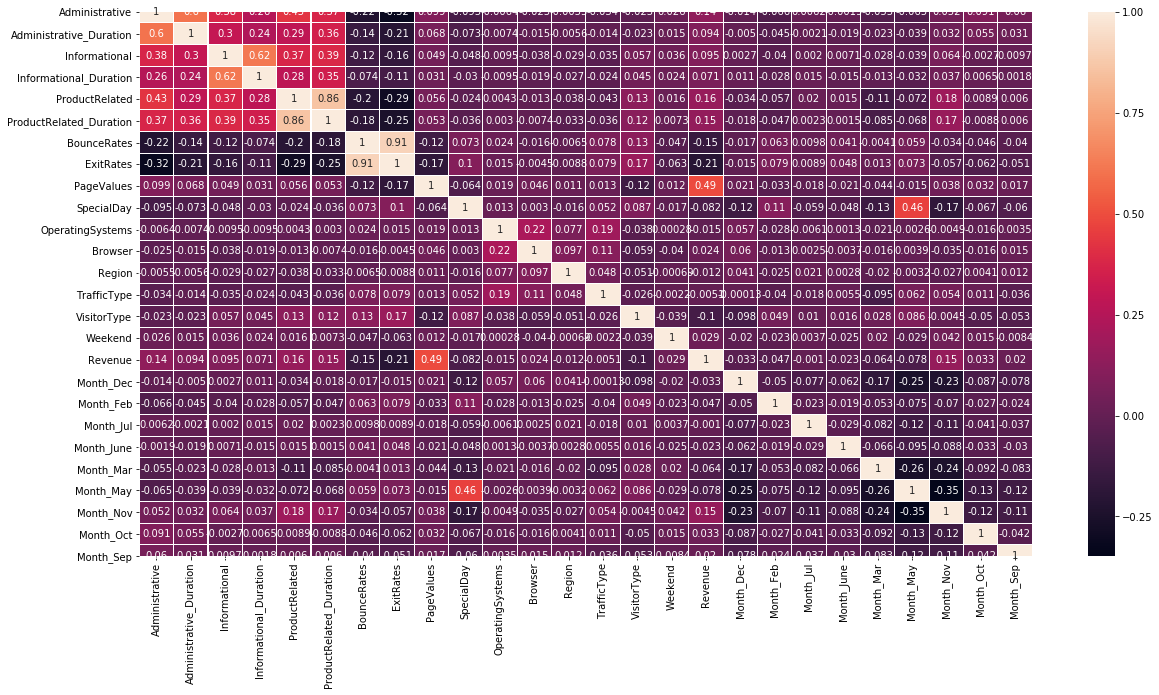

In [329]:
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(),annot=True,linewidths=.05)

A few of the attributes are somewhat correlated. The only extremely high correlations are BounceRates and ExitRates, and ProductRelated and ProductRelated Duration. 

### Assumption of Lack of outliers

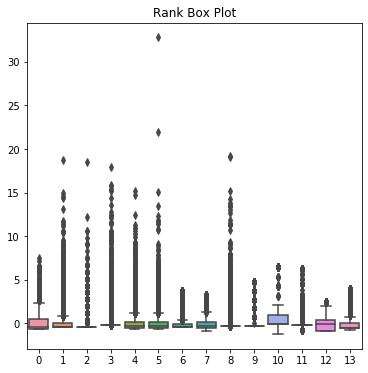

In [385]:
rank_box = sns.boxplot(data= scaler.fit_transform(df2.iloc[:,0:14])).set_title("Rank Box Plot")

Administrative_Duration, Informational, ProductRelated_Duration and PageValues each have outliers

## Logistical Model

Training Accuracy : 0.8856447688564477
Testing Accuracy : 0.8832116788321168


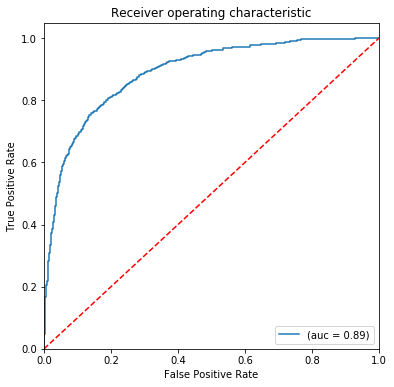

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3124
           1       0.77      0.36      0.49       575

    accuracy                           0.88      3699
   macro avg       0.83      0.67      0.71      3699
weighted avg       0.87      0.88      0.86      3699



In [431]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
y_pred_log = logmodel.predict(x_test)

# evaluating the model
print("Training Accuracy :", logmodel.score(x_train, y_train))
print("Testing Accuracy :", logmodel.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred_log)


# roc curve
roc=roc_auc_score(y_test, logmodel.predict_proba(x_test)[:,1])

prob_model  = logmodel.predict_proba(x_test)
predictions = prob_model[:,1]
fpr, tpr, threshold = roc_curve(y_test, predictions)

plt.figure()
plt.plot(fpr, tpr, label='(auc = %0.2f)' % roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print(cr)

### Selecting the best feature

In [60]:
from sklearn.feature_selection import SelectKBest, chi2

best_attr = SelectKBest(score_func=chi2, k = 10)
fit = best_attr.fit(X, y)
best_scores = pd.DataFrame(fit.scores_)
best_columns = pd.DataFrame(X.columns)
feature_scores = pd.concat([best_columns, best_scores], axis = 1)
feature_scores.columns = ['Specs', 'Score']
print(feature_scores.nlargest(18, 'Score'))

                      Specs          Score
5   ProductRelated_Duration  877404.339415
8                PageValues  175155.358332
1   Administrative_Duration   41739.754262
3    Informational_Duration   35331.666252
4            ProductRelated   19313.820868
0            Administrative    1133.965531
2             Informational     358.524257
22                Month_Nov     223.548231
21                Month_May      54.997108
9                SpecialDay      53.716235
20                Month_Mar      42.613274
6               BounceRates      29.658183
7                 ExitRates      28.981189
17                Month_Feb      26.961176
14              VisitorType      19.183544
23                Month_Oct      12.571184
16                Month_Dec      11.624839
11                  Browser       8.928969


### Logistic Model #2, fewer attributes

In [62]:
import statsmodels.formula.api as smf
model_limited = smf.logit(formula="Revenue ~ ProductRelated_Duration + PageValues + \
                          Administrative_Duration + Informational_Duration + ProductRelated + \
                          Administrative + Informational", data= df2).fit()
model_limited.summary()

Optimization terminated successfully.
         Current function value: 0.310708
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Revenue   No. Observations:                12330
Model:                          Logit   Df Residuals:                    12322
Method:                           MLE   Df Model:                            7
Date:                Fri, 01 May 2020   Pseudo R-squ.:                  0.2789
Time:                        12:11:21   Log-Likelihood:                -3831.0
converged:                       True   LL-Null:                       -5312.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.7637      0.045    -61.628      0.000      -2.852      -2.676
ProductRelated_Duration  4.517e-05   2.78e-05      1.624      0.104   -9.34e-06    9.97e-05
PageValues                  0.0873      0.002     37.485      0.000       0.083       0.092
Administrative_Duration -7.207e-05      0.000     -0.370      0.711      -0.000       0.000
Informational_Duration   1.292e-05      0.000      0.058      0.954      -0.000       0.000
ProductRelated              0.0050      0.001      4.410      0.000       0.003       0.007
Administrative              0.0280      0.011      2.606      0.009       0.007       0.049
Informational               0.0248      0.027      0.925      0.355      -0.028       0.077
===========================================================================================
"""

The model shows the coefficients, standard error, z-score, and confidence intervals. Only the variables PageValues, ProductRelated, and Admin have a significant effect on the log odds of Revenue as indicated by the p-value < 0.05. Since each of those variables are numeric, they can be interpreted as:

- For every one increase in PageValues, the log odds of Revenue increase by 0.0873.
- For every one increase in ProductRelated, the log odds of Revenue increase by 0.0050.
- For every one increase in Admin, the log odds of Revenue increase by 0.0028.



# #4. Clustering Analysis

#### Bounce Rate vs. Admin

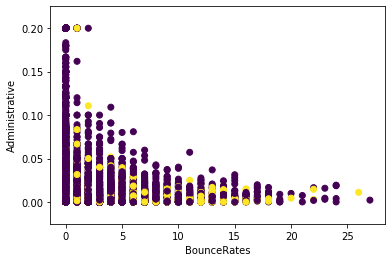

In [64]:
# Scatter Plot

plt.scatter(df['Administrative'], df['BounceRates'], c=df['Revenue'])
plt.ylabel('Administrative')
plt.xlabel('BounceRates')
plt.show()
plt.show()

### Elbow Method

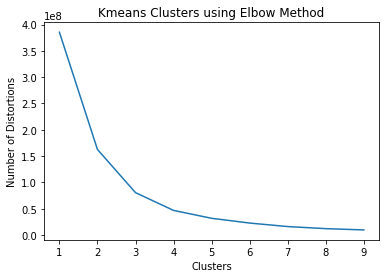

In [163]:
# Use the elbow method to determine number of clusters

error = []

for i in range(1, 10):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               max_iter = 300,
               n_init = 10,  
               tol = 1e-04,
               random_state = 0)
    km.fit(km_data)
    error.append(km.inertia_)
    
plt.plot(range(1,10), error)
plt.title("Kmeans Clusters using Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("Number of Distortions")
plt.show()

In [150]:
km_data = df.iloc[:, [1,6]]
km_data.shape

(12330, 2)

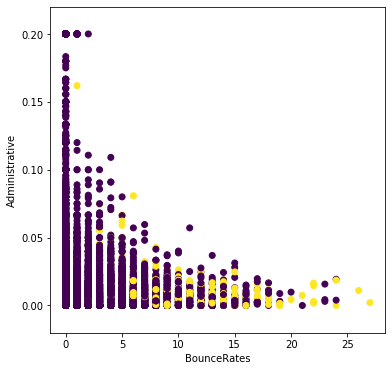

In [476]:
# Plot data with clusters

kmeans = KMeans(n_clusters = 2)
kmeans.fit(km_data)
labels = kmeans.predict(km_data)
plt.scatter(df['Administrative'],df['BounceRates'],c = labels)
plt.ylabel('Administrative')
plt.xlabel('BounceRates')
plt.show()

In [467]:
# Evaluating our Kmeans cluster

# cross tabulation table
km_df = pd.DataFrame({'labels':labels,"Revenue":df['Revenue']})
ct = pd.crosstab(km_df['labels'],km_df['Revenue'])
print(ct)

Revenue  False  True 
labels               
0        10034   1769
1          388    139


We cluster data in two groups. In order to evaluate clustering we will use cross tabulation table.

There are two clusters that are 0 and 1
First class 0 includes 10024 non purchases and 1769 purchases
Second class 1 includes 388 non purchases and 139 purchases  

Using the elbow method we can confirm the best number of clusters is 2 or 3. 

### Clustering Hierarchy

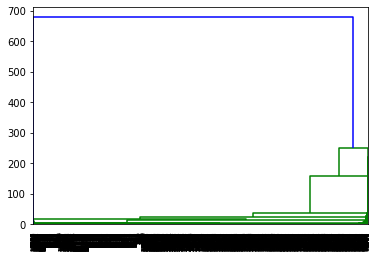

In [165]:
merg = linkage(km_data,method = 'single')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 6)
plt.show()

Vertical lines are clusters
height on dendogram: distance between merging cluster
method= 'single' : closest points of clusters

# #5. Machine Learning Algorithms

### K-Nearest Neighbor

In [363]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred_knn3 = knn.predict(x_test)
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test))

With KNN (K=3) accuracy is:  0.8656393619897269


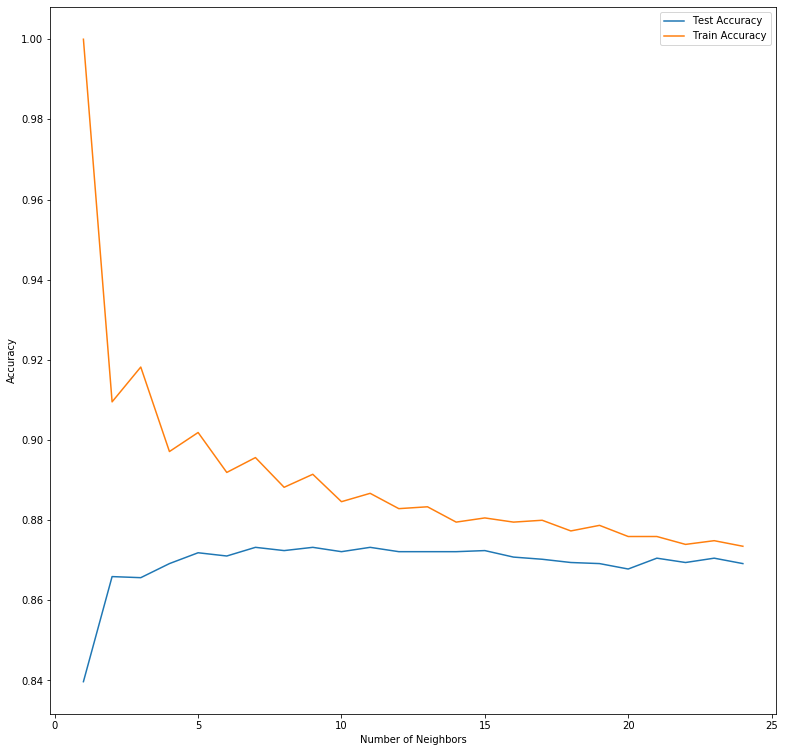

In [377]:
# Find the best number of neighbors

k_num = np.arange(1, 25)
train_acc = []
test_acc = []

for i, k in enumerate(k_num):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    train_acc.append(knn.score(x_train, y_train))
    test_acc.append(knn.score(x_test, y_test))
    
plt.figure(figsize=[13,13])
plt.plot(k_num, test_acc, label = 'Test Accuracy')
plt.plot(k_num, train_acc, label = 'Train Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


The number of neighbors with the highest test accuracy is: K = 7

With KNN (K=7) accuracy is:  0.8732089753987564


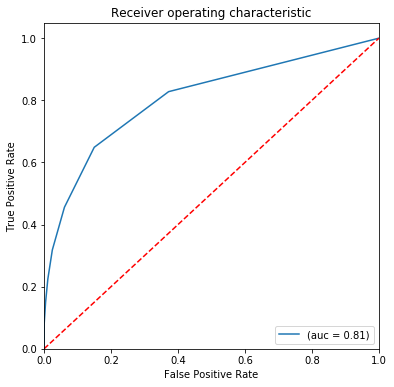

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3124
           1       0.70      0.32      0.44       575

    accuracy                           0.87      3699
   macro avg       0.79      0.65      0.68      3699
weighted avg       0.86      0.87      0.85      3699



In [447]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print('With KNN (K=7) accuracy is: ',knn.score(x_test,y_test))

# classification report
cr = classification_report(y_test, y_pred_knn)

# roc curve
roc=roc_auc_score(y_test, knn.predict_proba(x_test)[:,1])

prob_model  = knn.predict_proba(x_test)
predictions = prob_model[:,1]
fpr, tpr, threshold = roc_curve(y_test, predictions)

plt.figure()
plt.plot(fpr, tpr, label='(auc = %0.2f)' % roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print(cr)

### Naive Bayes

Training Accuracy : 0.6740817981693894
Testing Accuracy : 0.6747769667477697


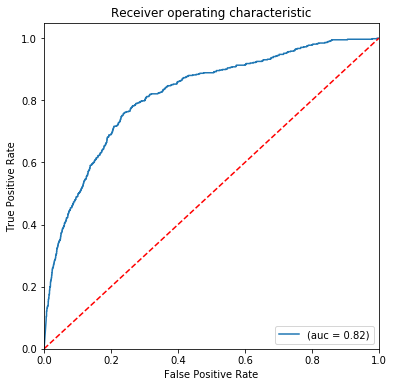

              precision    recall  f1-score   support

           0       0.95      0.65      0.77      3124
           1       0.30      0.83      0.44       575

    accuracy                           0.67      3699
   macro avg       0.63      0.74      0.61      3699
weighted avg       0.85      0.67      0.72      3699



In [433]:
model = GaussianNB()
model.fit(x_train, y_train)

y_pred_nb = model.predict(x_test)


# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred_nb)


# roc curve
roc=roc_auc_score(y_test, model.predict_proba(x_test)[:,1])

prob_model  = model.predict_proba(x_test)
predictions = prob_model[:,1]
fpr, tpr, threshold = roc_curve(y_test, predictions)

plt.figure()
plt.plot(fpr, tpr, label='(auc = %0.2f)' % roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print(cr)

### Support Vector Machine

Training Accuracy : 0.9070791333565056
Testing Accuracy : 0.8891592322249257


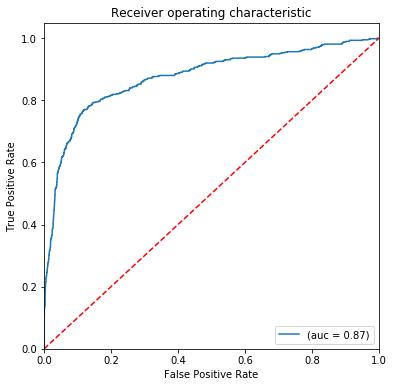

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3124
           1       0.73      0.45      0.56       575

    accuracy                           0.89      3699
   macro avg       0.82      0.71      0.75      3699
weighted avg       0.88      0.89      0.88      3699



In [434]:

svc = SVC(probability = True)
model = svc.fit(x_train, y_train)

y_pred_svm = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred_svm)


# roc curve
roc=roc_auc_score(y_test, model.predict_proba(x_test)[:,1])

prob_model  = model.predict_proba(x_test)
predictions = prob_model[:,1]
fpr, tpr, threshold = roc_curve(y_test, predictions)

plt.figure()
plt.plot(fpr, tpr, label='(auc = %0.2f)' % roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print(cr)

### Random Forest

Training Accuracy : 0.9888773027459159
Testing Accuracy : 0.8924033522573669


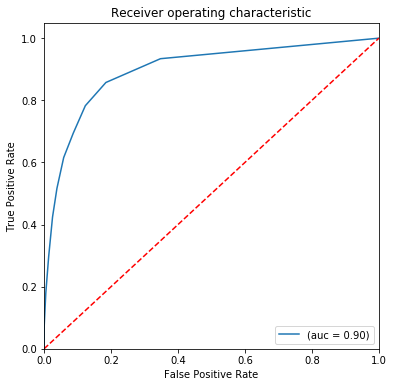

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3124
           1       0.71      0.52      0.60       575

    accuracy                           0.89      3699
   macro avg       0.81      0.74      0.77      3699
weighted avg       0.88      0.89      0.89      3699



In [436]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred_rf = model.predict(x_test)


# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred_rf)


# roc curve
roc=roc_auc_score(y_test, model.predict_proba(x_test)[:,1])

prob_model  = model.predict_proba(x_test)
predictions = prob_model[:,1]
fpr, tpr, threshold = roc_curve(y_test, predictions)

plt.figure()
plt.plot(fpr, tpr, label='(auc = %0.2f)' % roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print(cr)


### Neural Network


 Testing Accuracy of Neural Network:  89.078


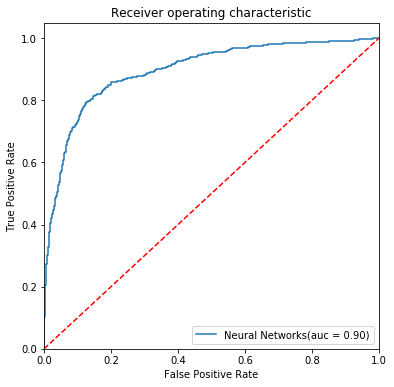

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3124
           1       0.77      0.42      0.55       575

    accuracy                           0.89      3699
   macro avg       0.84      0.70      0.74      3699
weighted avg       0.88      0.89      0.88      3699



In [441]:


backend.clear_session()

model_nn = Sequential()
model_nn.add(Dense(units = 128, activation = 'relu', input_dim = 25))
model_nn.add(BatchNormalization())
model_nn.add(Dropout(0.25))
model_nn.add(Dense(128, kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001), activation = 'relu'))
model_nn.add(BatchNormalization())
model_nn.add(Dropout(0.25))
model_nn.add(Dense(128, kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001), activation = 'relu'))
model_nn.add(BatchNormalization())
model_nn.add(Dropout(0.25))
model_nn.add(Dense(units = 1, activation = 'sigmoid'))
model_nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_nn.fit(x_train, y_train, batch_size = 20, epochs = 3, verbose=False)

y_pred_nn = model_nn.predict_classes(x_test)
print("\n Testing Accuracy of Neural Network: ",round(accuracy(y_test,y_pred_nn),3))

roc=roc_auc_score(y_test, model_nn.predict_proba(x_test)[:,0])
cr=classification_report(y_test, y_pred_nn)


probs = model_nn.predict_proba(x_test)
preds = probs[:,0]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Neural Networks(auc = %0.2f)' % roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print(cr)

### Model Accuracy

(60, 95)

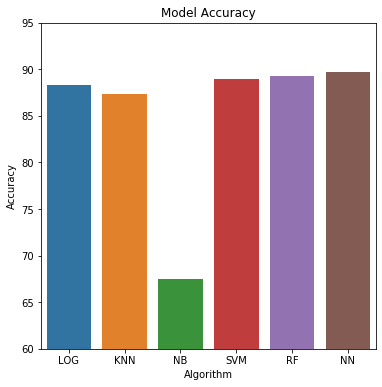

In [439]:
ml_accuracy = [['LOG',accuracy(y_test, y_pred_log)],
               ['KNN',accuracy(y_test, y_pred_knn)],
               ['NB',accuracy(y_test, y_pred_nb)],
              ['SVM',accuracy(y_test, y_pred_svm)],
              ['RF',accuracy(y_test, y_pred_rf)] ,
              ['NN',accuracy(y_test, y_pred_nn)]]

ml_acc_models = pd.DataFrame(ml_accuracy, columns = ['Algorithm', 'Accuracy'])

plt.figure()
ax = sns.barplot(x=ml_acc_models['Algorithm'],y=ml_acc_models['Accuracy'])
ax.set_title('Model Accuracy')
ax.set_ylim(60,95)

Conclusion:

In this project we explored the dataset to determine the best attributes for online shoppers intentions to make a purchase. Then we cleaned the dataset by removing missing attributes and normalizing the dataset. Afterwards, we use predictive analytics to create models that best predict when a shopper will make an online purchase. The best models to use are Random Forest Algorithms and Neural Networks. 

References:

- Géron Aurélien. (2019). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. Beijing ; Boston ; Farnham ; Sebastopol ; Tokyo: OReilly.

- Dabbura, I. (2019, September 3). K-means Clustering: Algorithm, Applications, Evaluation Methods, and Drawbacks. Retrieved from https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

- Segaran, T. (2007). Programming collective intelligence: building smart Web 2.0 applications. Beijing: OReilly.

- Chollet François. (2018). Deep learning with Python. Shelter Island, NY: Manning Publications Co.

- Coelho, L. P., & Richert, W. (2015). Building machine learning systems with Python: get more from your data through creating practical machine learning systems with Python. Birmingham, UK: Packt Publishing.

- Swaminathan, S. (2019, January 18). Logistic Regression - Detailed Overview. Retrieved from https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

- kanncaa1. (2018, July 24). Machine Learning Tutorial for Beginners. Retrieved from https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners

- kanncaa1. (2018, May 26). ROC Curve with k-Fold CV. Retrieved from https://www.kaggle.com/kanncaa1/roc-curve-with-k-fold-cv

- Python sklearn.metrics.roc_auc_score() Examples. (n.d.). Retrieved from https://www.programcreek.com/python/example/86675/sklearn.metrics.roc_auc_score

- 1.13. Feature selection¶. (n.d.). Retrieved from https://scikit-learn.org/stable/modules/feature_selection.html

